In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
PATIENT_PATH = "dataset/schizophrenia/"
HEALTHY_PATH = "dataset/healthy/"
patient = pd.read_csv(PATIENT_PATH + "patient_0.csv", index_col=0)
healthy = pd.read_csv(HEALTHY_PATH + "healthy0.csv", index_col=0)

In [6]:
patient.head()

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
F7,108.01,208.82,388.84,446.45,446.45,349.24,86.41,7.20,7.20,86.41,...,46.81,7.20,-111.61,-190.82,-352.84,-471.65,-532.86,-532.86,-410.44,-331.24
F3,176.42,237.63,309.63,417.65,439.25,356.44,108.01,46.81,147.62,266.43,...,259.23,237.63,7.20,-151.22,-392.44,-471.65,-550.86,-572.46,-532.86,-493.25
F4,-90.01,-72.01,-111.61,-162.02,-122.41,-72.01,46.81,86.41,118.81,158.42,...,187.22,79.21,-291.63,-493.25,-500.45,-432.05,-370.84,-493.25,-702.08,-691.28
F8,7.20,18.00,-82.81,-151.22,-140.42,-32.40,118.81,129.61,28.80,7.20,...,118.81,39.60,-280.83,-410.44,-381.64,-313.23,-331.24,-471.65,-792.09,-831.69
T3,39.60,129.61,277.23,356.44,309.63,208.82,-10.80,-43.20,7.20,79.21,...,0.00,-32.40,-180.02,-291.63,-471.65,-572.46,-583.26,-550.86,-360.04,-270.03


In [26]:
## slicing data
patient_trimmed = patient.iloc[:,:3840]
healthy_trimmed = healthy.iloc[:,:3840]

In [27]:
patient_trimmed.head()

,0,1,2,3,4,5,6,7,8,9,...,3830,3831,3832,3833,3834,3835,3836,3837,3838,3839
F7,108.01,208.82,388.84,446.45,446.45,349.24,86.41,7.20,7.20,86.41,...,-50.41,-111.61,-133.21,-90.01,-50.41,-72.01,-270.03,-432.05,-770.48,-853.29
F3,176.42,237.63,309.63,417.65,439.25,356.44,108.01,46.81,147.62,266.43,...,79.21,18.00,0.00,18.00,79.21,79.21,-50.41,-230.43,-590.46,-712.88
F4,-90.01,-72.01,-111.61,-162.02,-122.41,-72.01,46.81,86.41,118.81,158.42,...,-392.44,-450.05,-522.06,-482.45,-262.83,-133.21,-172.82,-201.62,-331.24,-352.84
F8,7.20,18.00,-82.81,-151.22,-140.42,-32.40,118.81,129.61,28.80,7.20,...,-550.86,-493.25,-471.65,-450.05,-252.03,-133.21,-61.21,-122.41,-223.22,-241.23
T3,39.60,129.61,277.23,356.44,309.63,208.82,-10.80,-43.20,7.20,79.21,...,-252.03,-252.03,-172.82,-111.61,-50.41,-72.01,-252.03,-432.05,-770.48,-810.09


In [28]:
healthy_trimmed.head()

,0,1,2,3,4,5,6,7,8,9,...,3830,3831,3832,3833,3834,3835,3836,3837,3838,3839
F7,347.78,507.87,488.54,369.86,347.78,408.50,488.54,449.90,369.86,427.82,...,-110.41,-151.81,-171.13,-91.08,69.00,69.00,27.60,69.00,209.77,229.09
F3,198.73,358.82,449.90,309.14,149.05,229.09,557.55,637.59,488.54,378.14,...,-342.26,-430.58,-372.62,-190.45,38.64,27.60,-22.08,69.00,237.37,198.73
F4,637.59,659.67,488.54,328.46,248.41,298.09,389.18,369.86,259.45,248.41,...,-320.18,-411.26,-391.94,-251.17,57.96,168.37,179.41,187.69,118.69,77.28
F8,298.09,317.42,317.42,289.81,289.81,369.86,408.50,339.50,138.01,88.32,...,-350.54,-391.94,-391.94,-331.22,-132.49,-30.36,19.32,69.00,19.32,19.32
T3,278.77,378.14,378.14,317.42,328.46,389.18,469.22,488.54,557.55,618.27,...,57.96,38.64,19.32,38.64,118.69,77.28,-22.08,-11.04,38.64,27.60


In [135]:
def FFT(df):
    fs = 128 # Sampling rate (128 Hz)
    band_data = pd.DataFrame() 
    for index in list(df.index):
        data = df.loc[index]  # 2 sec of data b/w 0.0-100.0

        # Get real amplitudes of FFT (only in postive frequencies)
        fft_vals = np.absolute(np.fft.rfft(data))
        # Get frequencies for amplitudes in Hz
        fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)
        # Define EEG bands
        eeg_bands = {'Delta': (0, 4),
                     'Theta': (4, 8),
                     'Alpha': (8, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

        # Take the mean of the fft amplitude for each EEG band
        eeg_band_fft = dict()
        for band in eeg_bands:  
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
            eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

        ser = pd.Series(eeg_band_fft,name=index)
        band_data = band_data.append(ser)
    return band_data

In [141]:
patient_fft = FFT(patient_trimmed)
patient_fft.head()

,Alpha,Beta,Delta,Gamma,Theta
F7,30163.724325,10503.628995,64401.557503,2714.926356,36431.709892
F3,29590.648590,10103.660926,72826.301968,2797.441176,38586.291983
F4,32383.923604,11107.812804,76092.051821,3138.693107,36989.554709
F8,29309.923230,10866.892814,59129.989860,3370.449584,33354.975770
T3,32760.801279,10392.305838,56168.057290,2650.067923,34243.408880


In [142]:
healthy_fft = FFT(healthy_trimmed)
healthy_fft.head()

,Alpha,Beta,Delta,Gamma,Theta
F7,24255.277673,8460.693814,43339.241497,2716.853558,30907.076287
F3,27408.004498,10098.967132,53061.267130,3198.392638,38706.967414
F4,23615.909144,8838.468132,49084.854803,2920.117994,31643.334116
F8,16246.564212,5531.102384,29592.973602,1981.607309,19897.083164
T3,23683.214032,8454.482951,39614.079174,2717.633009,27782.004931


## Patient Frequency Plot

<AxesSubplot:xlabel='Bands'>

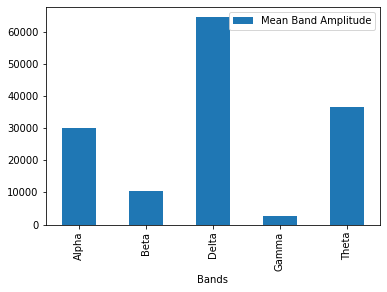

In [177]:
bands = list(patient_fft.columns)
values = [patient_fft.loc['F7'][i] for i in list(patient_fft.columns)]
df = pd.DataFrame({
    'Bands':bands,
    'Mean Band Amplitude':values
})
df.plot(x="Bands", y="Mean Band Amplitude", kind="bar")

## Healthy Frequency Plot

<AxesSubplot:xlabel='Bands'>

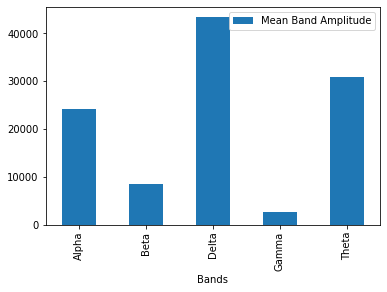

In [178]:
bands = list(healthy_fft.columns)
values = [healthy_fft.loc['F7'][i] for i in list(healthy_fft.columns)]
df = pd.DataFrame({
    'Bands':bands,
    'Mean Band Amplitude':values
})
df.plot(x="Bands", y="Mean Band Amplitude", kind="bar")